In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from itertools import combinations 
import seaborn as sns

plt.rcParams['figure.dpi'] = 400

# Figure 3

In [2]:
means = []
combo1 = []
combo2 = []
cities = ["Jaffna", "Nallur", "Navanthurai","Kokkuvil", "Uduvil", "Mankumban", "Kopay",  "Inuvil", "Gurunagar", "Ariyalai"][::-1]
for combo in combinations(cities, 2): 
    try:
        fst = pd.read_csv(f"../data/fst/{combo[0]}{combo[1]}.txt.weir.fst", sep="\t")
    except FileNotFoundError as not_found: 
        fst = pd.read_csv(f"../data/fst/{combo[1]}{combo[0]}.txt.weir.fst", sep="\t")
    mean = fst["WEIR_AND_COCKERHAM_FST"].mean() if fst["WEIR_AND_COCKERHAM_FST"].mean() > 0 else 0
    means.append(mean)
    combo1.append(combo[0])
    combo2.append(combo[1])

pairfst = pd.DataFrame({"Population 1":combo1, "Population 2":combo2, "fst mean":means})
pairfst["fst mean"] = pairfst["fst mean"].round(2)
pairfst["Population 2"] = pd.Categorical(pairfst["Population 2"], cities)
pairfst["Population 1"] = pd.Categorical(pairfst["Population 1"], cities)

# Rename Jaffna to Jaffna City
pairfst['Population 1'] = pairfst['Population 1'].replace('Jaffna', 'Jaffna City')
pairfst['Population 2'] = pairfst['Population 2'].replace('Jaffna', 'Jaffna City')

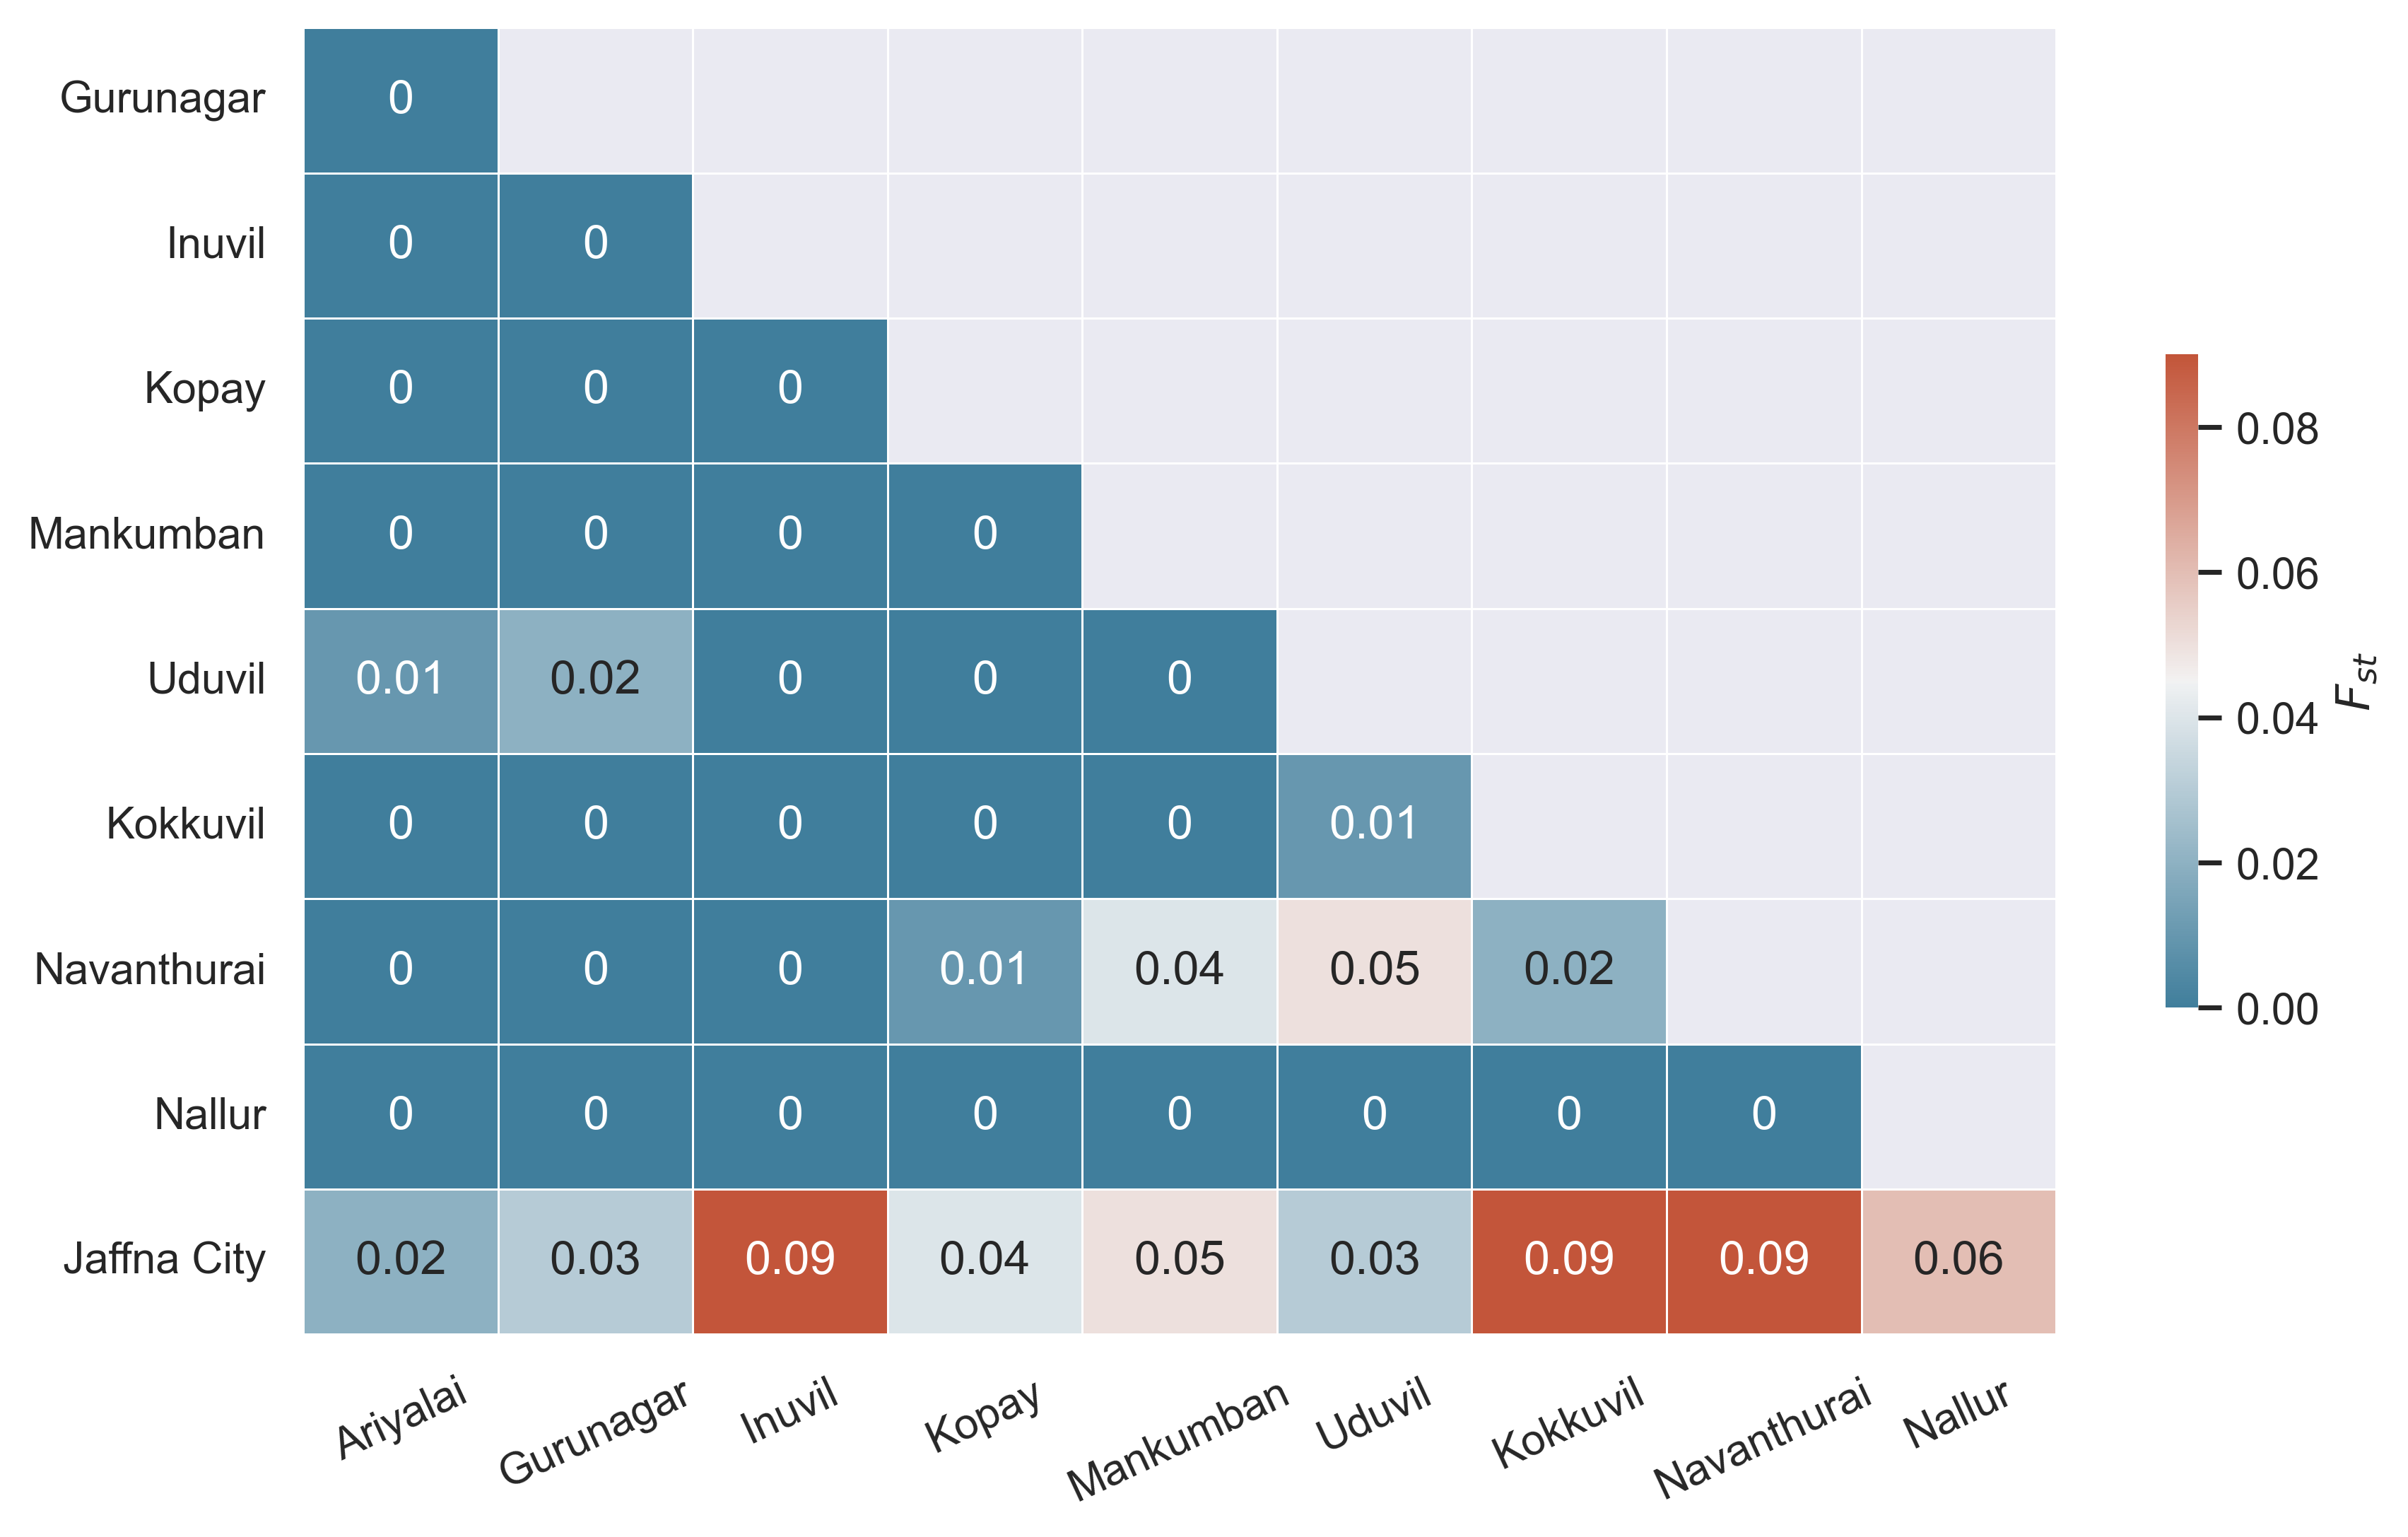

In [3]:
sns.set(rc = {'figure.figsize':(10,6)})
pairs = pairfst.pivot(index="Population 2", columns="Population 1", values="fst mean")
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax = sns.heatmap(pairs, annot=True, cmap=cmap, linewidths=0.5, cbar_kws={"shrink": .5, 'label': '$F_{st}$'})
ax.grid(False)
plt.xticks(rotation=25)
plt.xlabel(None)
plt.ylabel(None)
plt.show()